# Survey 2020 - Kagglers in China, USA & Overall
This EDA descripes the current situation of kagglers in China, compared with those in the USA and other countries or regions.  
The status of others could also present the overall status of kaggle community.  
These interactive plots are powered by plotly, which means they could be manipulating by operations:  

- Drag to scale the plot, typically when some values of categories are quit large but with less interest, e.g. None in some cases;
- Click the legend of a category to remove it from plot;  
- Double click the legend of a category to leave it only on plot.  

These can be used to explore the specfic parts you are interested in.

<b>NOTE</b>: Make the region that plot displayed on as <b>wider</b> as possible to get a better exploring experience!  <br>
Otherwises plots would be narrowed, texts and elements are crowed with each other.

<b>Contents:</b><br>
[Q1, Q2, Q3: Population Features of Kagglers](#Q1,-Q2,-Q3:-Population-Features-of-Kagglers)  
[Q4: Education Level](#Q4:-Education-Level)  
[Q5: Title](#Q5:-Title)  
[Q6: Coding Years](#Q6:-Coding-Years)  
[Q7: Programming Language](#Q7:-Programming-Language)  
[Q8: Programming Language Recommended](#Q8:-Programming-Language-Recommended)  
[Q9: IDE](#Q9:-IDE)  
[Q10: Hosted Notebook Products](#Q10:-Hosted-Notebook-Products)  
[Q11: Cloud Computing Platform](#Q11:-Cloud-Computing-Platform)  
[Q12: Specialized Hardware](#Q12:-Specialized-Hardware)  
[Q13: TPU Used Time](#Q13:-TPU-Used-Time)  
[Q14: Visualization Tools](#Q14:-Visualization-Tools)  
[Q15: ML Methods Used Years](#Q15:-ML-Methods-Used-Years)  
[Q16: ML Frameworks](#Q16:-ML-Frameworks)  
[Q17: ML algorithms](#Q17:-ML-algorithms)  
[Q18: CV Methods](#Q18:-CV-Methods)  
[Q19: NLP Methods](#Q19:-NLP-Methods)  
[Q20: Employed Company Size](#Q20:-Employed-Company-Size)  
[Q21: DS Workloads Individuals](#Q21:-DS-Workloads-Individuals)  
[Q22: ML in Business](#Q22:-ML-in-Business)  
[Q23: Work Role Acitivities](#Q23:-Work-Role-Acitivities)  
[Q24: Yearly Compensation](#Q24:-Yearly-Compensation)  
[Q25: Spend on ML/CCS](#Q25:-Spend-on-ML/CCS)  
[Q26: Cloud Computing Platforms](#Q26:-Cloud-Computing-Platforms)  
[Q27: CC products](#Q27:-CC-products)  
[Q28: ML Products](#Q28:-ML-Products)  
[Q29: Big Data Products](#Q29:-Big-Data-Products)  
[Q30: Big Data Product Used Most Often](#Q30:-Big-Data-Product-Used-Most-Often)  
[Q31: BI Tools](#Q31:-BI-Tools)  
[Q32: BI Tools Used Most Often](#Q32:-BI-Tools-Used-Most-Often)  
[Q33: Auto ML Categories](#Q33:-Auto-ML-Categories)  
[Q34: Auto ML Tools](#Q34:-Auto-ML-Tools)  
[Q35: ML Management Tools](#Q35:-ML-Management-Tools)  
[Q36: Place to Share Work Publicly](#Q36:-Place-to-Share-Work-Publicly)  
[Q37: DS Course Platforms](#Q37:-DS-Course-Platforms)  
[Q38: Primary Data Analysis Tools](#Q38:-Primary-Data-Analysis-Tools)  
[Q39: Favorite Media Sources on DS topics](#Q39:-Favorite-Media-Sources-on-DS-topics)  


An example is like this:
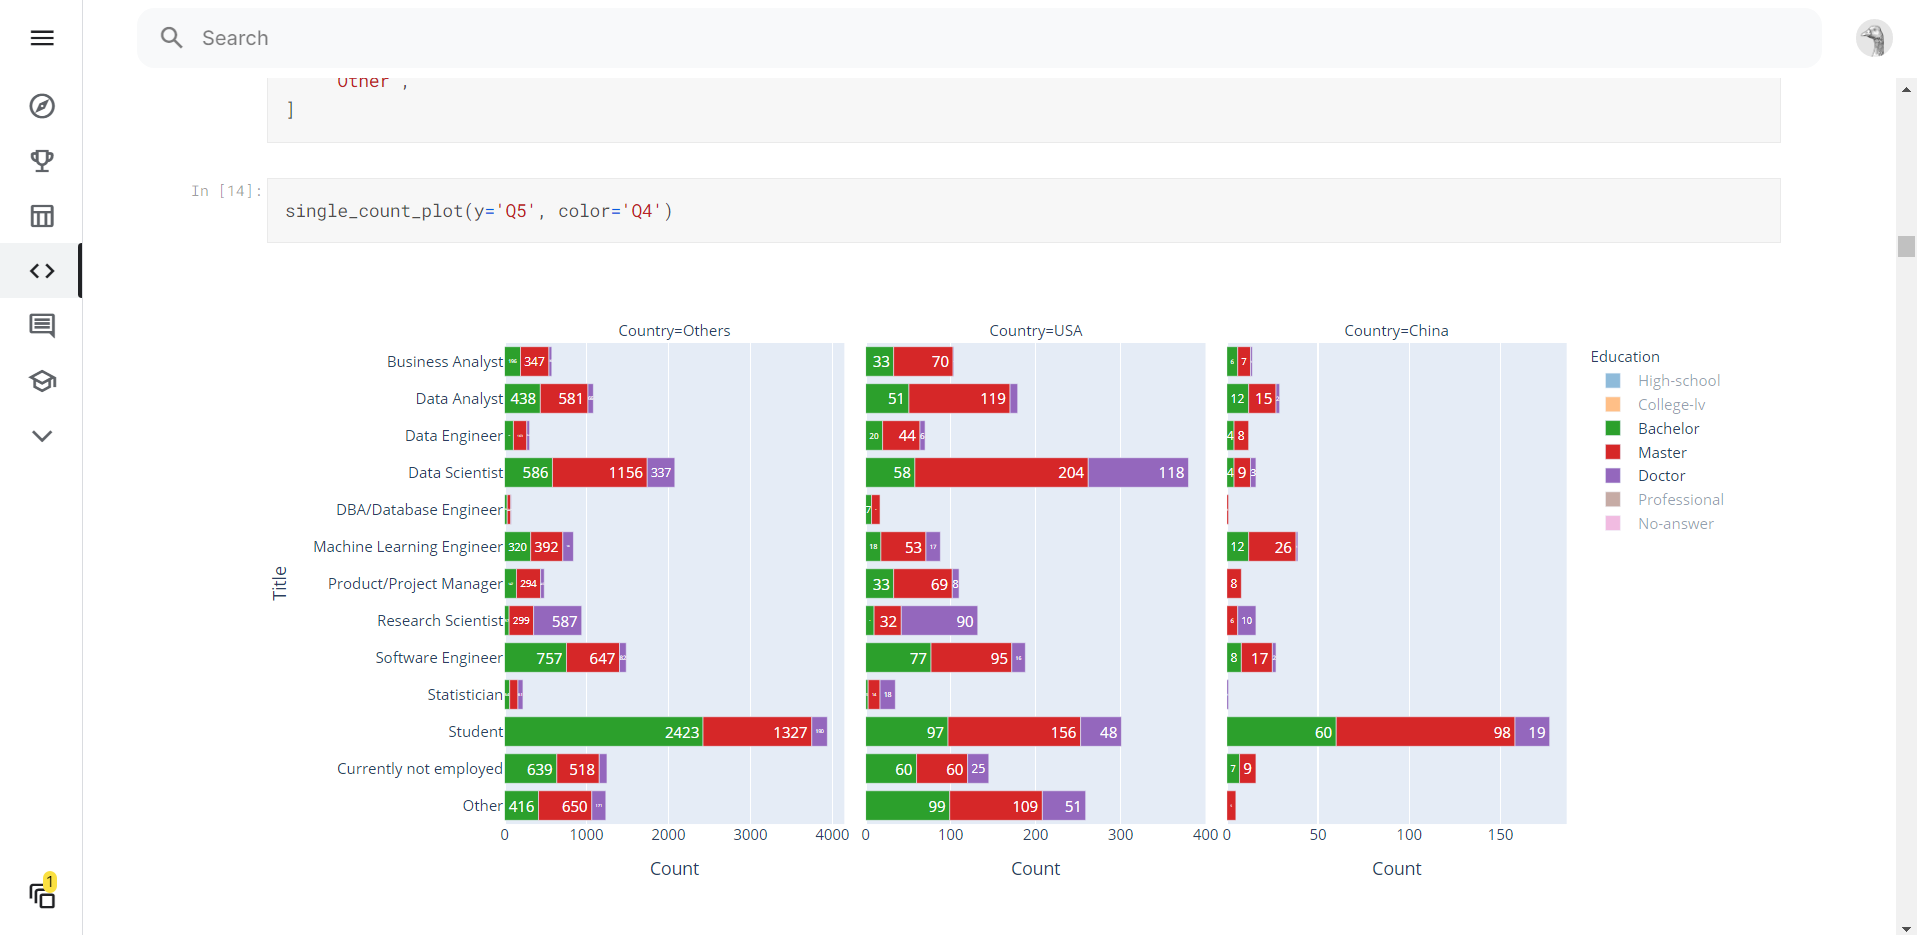

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

import plotly.express as px
import plotly.graph_objects as go

from tqdm.auto import tqdm

print(f"Loading data...")
fpath = '../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv'
df0 = pd.read_csv(fpath, header=[0, 1])

print(f"Striping space in string...")
for col in tqdm(df0.columns):
    try:
        df0[col] = df0[col].str.strip(' ')
    except Exception as e:
        pass

df0.info()
# df0.sample()

In [ ]:
cols = df0.columns.to_frame().reset_index(drop=True)
# cols

cols0 = cols[0].rename(None)
cols0[0] = 'T0'
cols1 = cols[1].rename(None)

df = df0.copy()
df.columns = cols0
# df.sample()

In [ ]:
q_mapper = dict()
def count_plot(df, x, y, color, yticktext_br=None):
    fig = px.bar(df, 
                 x=x, y=y,
                 text=x,
                 color=color,
                 facet_col='Q3',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 labels=q_mapper,
                 category_orders=category_orders)
    fig.update_traces(textangle=0, textposition='inside')
    fig.update_xaxes(matches=None)
    
    # Break line on long text by symbol or number of words
    if yticktext_br:
        yticks = list(fig.layout.yaxis.categoryarray)
        if yticktext_br == 'br':  # bracket
            for i, ytick in enumerate(yticks):
                yticks[i] = yticks[i].replace(' (', '<br>(')
        if yticktext_br == 'sl':  # slash
            for i, ytick in enumerate(yticks):
                yticks[i] = yticks[i].replace(' /', '<br>/')
        elif isinstance(yticktext_br, int):  # number of words
            for i, ytick in enumerate(yticks):
                n_words = len(ytick.split(' ')) + 1
                if n_words >= yticktext_br:
                    n_max = int((n_words) / 2)
                    yticks[i] = ytick.replace(' ', '<br>', n_max).replace('<br>', ' ', n_max-1)
        fig.update_layout(yaxis=dict(tickmode='array',
                                     tickvals=np.arange(len(yticks)),
                                     ticktext=yticks,))
    return fig

In [ ]:
def single_count_plot(y, color, df=df, x='Count', yticktext_br=None):
    grouper = ['Q3', y, color] 
    dfg = df.groupby(grouper).agg(Count=('T0', 'count')).reset_index()
    # dfg
    fig = count_plot(dfg, x, y, color, yticktext_br)
    # print(fig.layout.yaxis)
    fig.show()
    
    
# single_count_plot('Q25', 'Q5')

In [ ]:
def multi_count_plot(y, color, df=df, x='Count', yticktext_br=None):
    df1 = df[cols0[cols0.str.contains(y)].tolist()]

    # Get choice as columns name
    choice_cols = []
    for col in df1.columns:
        s = df1[col]
        choice_cols.append(s[s.first_valid_index()])
        
    global category_orders
    category_orders[y] = choice_cols
        
    df1.columns = choice_cols
    df1 = pd.concat([df1, df[['Q3', color]]], axis=1)
    # df1
    
    # Multiple choices count in groupby
    grouper = ['Q3', color]
    df1g = df1.groupby(grouper).count()
    df1g.columns.rename(y, inplace=True)
    df1g = df1g.stack().rename('Count')
    df1g = df1g.reset_index()
    # print(df1g[y])
    
    fig = count_plot(df1g, x, y, color, yticktext_br)
    fig.show()
    
    
# multi_count_plot(y='Q23', color='Q5', yticktext_br=5)

In [ ]:
def get_number_order(qno, df=df):
    num_df = df[[qno]].drop_duplicates().dropna()
    num_df['num'] = num_df[qno].str.extract("(\d+,?\d*)")
    num_df['num'] = num_df['num'].str.replace(',', '').astype(int)
    num_df = num_df.sort_values(['num'])
    return num_df[qno].tolist()


# get_number_order('Q25')

In [ ]:
# Swap the choices for consistency
def swap_col(colname1, colname2, df=df):
    s_colname1 = df[colname1].copy()
    df[colname1] = df[colname2]
    df[colname2] = s_colname1
    return df

## Q1, Q2, Q3: Population Features of Kagglers
Q1: What is your age (# years)?  
Q2: What is your gender?  
Q3: In which country do you currently reside?  

- There are 474 valid response from kagglers in China,  2237 in the USA, and 17325 in others; 
- There responses from China & USA make up 13.5% of all valid responses, Others are up to almost 90%;
- Most kagglers in China are of the ages in [18-34], with a peak on [22-24].

In [ ]:
q_mapper = {
    'Q1': 'Age',
    'Q2': 'Gender',
    'Q3': 'Country',
}
# q_mapper

category_orders = dict()
category_orders['Q1'] = get_number_order('Q1')
category_orders['Q2'] = [
    'Man',
    'Woman',
    'Nonbinary',
    'Prefer not to say',
    'Prefer to self-describe',
]
category_orders['Q3'] =  ['Others', 'USA', 'China']
# category_orders

In [ ]:
Q3_mapper = {'United States of America': 'USA',
             'China': 'China'}
df['Q3'] = df['Q3'].map(Q3_mapper).fillna('Others')
df['Q3'].value_counts(sort=True)

In [ ]:
single_count_plot(y='Q1', color='Q2')

## Q4: Education Level
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  
- Kagglers in China & USA are most likely to be a master, followed by bachelor. While generally there are almost as many bachelors as masters on Kaggle.

In [ ]:
Q4_mapper = {
    'No formal education past high school': 'High-school',
    'Some college/university study without earning a bachelor’s degree': 'College-lv',
    'Bachelor’s degree': 'Bachelor',
    'Master’s degree': 'Master',
    'Doctoral degree': 'Doctor',
    'Professional degree': 'Professional',
    'I prefer not to answer': 'No-answer',
}

df['Q4'] = df['Q4'].map(Q4_mapper)
print(df['Q4'].value_counts(sort=True))

q_mapper['Q4'] = 'Education'
category_orders['Q4'] = [x for x in Q4_mapper.values()]

In [ ]:
single_count_plot(y='Q4', color='Q1')

## Q5: Title
Select the title most similar to your current role (or most recent title if retired):  
- The largest group on Kaggle is student, followed by data scientist;  
- In USA, there seems to be more data scientists than students on Kaggle;  
- In China, there are fewer kagglers as data scientist than those as data analyst / ML engineer
- For research scientist, there are more doctors than masters. While for data scientist, the reverse applies.

In [ ]:
q_mapper['Q5'] = 'Title'
category_orders['Q5'] = [
    "Business Analyst",
    "Data Analyst",
    "Data Engineer",
    "Data Scientist",
    "DBA/Database Engineer",
    "Machine Learning Engineer",
    "Product/Project Manager",
    "Research Scientist",
    "Software Engineer",
    "Statistician",
    "Student",
    "Currently not employed",
    "Other",
]

In [ ]:
single_count_plot(y='Q5', color='Q4')

## Q6: Coding Years
For how many years have you been writing code and/or programming?  
- Generally, most kagglers have 1-5 years of coding experience;
- Most data scientists on Kaggle have 3-5 years of coding experice, while 5 - 10 years in the USA.

In [ ]:
Q6_mapper = {
    "I have never written code": 'Never',
    "< 1 years": '1-',
    "1-2 years": '1-2',
    "3-5 years": '3-5',
    "5-10 years": '5-10',
    "10-20 years": '10-20',
    "20+ years": '20+',
}

df['Q6'] = df['Q6'].map(Q6_mapper)
q_mapper['Q6'] = 'Coding Years'
category_orders['Q6'] = [x for x in Q6_mapper.values()]
df['Q6'].value_counts(sort=True)

In [ ]:
single_count_plot(y='Q6', color='Q5')

# Q7: Programming Language
What programming languages do you use on a regular basis? (Select all that apply)  
- The most popular programming languages for kagglers is Python;
- In the USA, R is still widely used, especially among data scienties and students.

In [ ]:
q_mapper['Q7'] = 'Programming Language'
category_orders['Q7'] = [
    'Python',
    'R',
    'SQL',
    'C',
    'C++',
    'Java',
    'Javascript',
    'Julia',
    'Swift',
    'Bash',
    'MATLAB',
    'None',
    'Other',
]

multi_count_plot(y='Q7', color='Q5')

# Q8: Programming Language Recommended
What programming language would you recommend an aspiring data scientist to learn first?
- Python exceeds.

In [ ]:
q_mapper['Q8'] = 'Programming Language Recommended'
category_orders['Q8'] = [
    'Python',
    'R',
    'SQL',
    'C',
    'C++',
    'Java',
    'Javascript',
    'Julia',
    'Swift',
    'Bash',
    'MATLAB',
    'None',
    'Other',
]

single_count_plot(y='Q8', color='Q5')

# Q9: IDE
Which of the following integrated development environments (IDE's) do you use on a regular basis? (Select all that apply)  
- Generally for kagglers, the top3 popular IDEs are Jupyter, VSCode, Pycharm;  
- Kagglers in China prefer Pycharm to VSCode.

In [ ]:
q_mapper['Q9'] = 'IDE'
multi_count_plot(y='Q9', color='Q5', yticktext_br='br')

## Q10: Hosted Notebook Products
Which of the following hosted notebook products do you use on a regular basis? (Select all that apply)  
- Generally, a lit bit more kagglers select Colab Notebooks than Kaggle Notebook;
- In the USA, most kaggler select to use none of hosted notebook products;
- In china, kagglers select Kaggle Notebooks 2X more than Colab Notebooks.

In [ ]:
q_mapper['Q10'] = 'Hosted Notebook Products'
multi_count_plot(y='Q10', color='Q5')

## Q11: Cloud Computing Platform
What type of computing platform do you use most often for your data science projects?  
- Generally, PC exceeds;
- While data scientists on Kaggle tend to use cloud computing platform more than other groups, which ratio is nearly 1/3;
- In the USA, over 1/2 of data scientists use platform.

In [ ]:
category_orders['Q11'] = [
    "A personal computer or laptop",
    "A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)",
    "A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)",
    "None",
    "Other",
]
q_mapper['Q11'] = 'Could Computing Platform'
single_count_plot(y='Q11', color='Q5', yticktext_br='br')

## Q12: Specialized Hardware
Which types of specialized hardware do you use on a regular basis? (Select all that apply)
- In the USA, there are fewer kaggler select to use GPUs on a regular basis than those not;
- While in others, the data shows more kagglers select to use GPUs.

In [ ]:
q_mapper['Q12'] = 'Specialized Hardware'
multi_count_plot(y='Q12', color='Q5')

## Q13: TPU Used Time
Approximately how many times have you used a TPU (tensor processing unit)?
- The data shows that if have used TPU, a kaggler is more likely to use not just once.

In [ ]:
category_orders['Q13'] = [
    "Never",
    "Once",
    "2-5 times",
    "6-25 times",
    "More than 25 times",
]
q_mapper['Q13'] = 'TPU Used Times'
single_count_plot(y='Q13', color='Q5')

## Q14: Visualization Tools
What data visualization libraries or tools do you use on a regular basis? (Select all that apply)
- Generally, the top2 popular visualization libraries are Matplotlib & Seaborn
- Plotly is a powerful for interactive visualization, but is not widely used yet

In [ ]:
q_mapper['Q14'] = 'Visualization Tools'
multi_count_plot(y='Q14', color='Q5')

## Q15: ML Methods Used Years
For how many years have you used machine learning methods?
- Generally, most kaggers have used ML methods for under 1 year, followed by 1-2 years;
- In the USA, data scientists on kaggle tend to have used more years than those in others.

In [ ]:
Q15_mapper = {
    "I do not use machine learning methods": "Never",
    "Under 1 year": "1-",
    "1-2 years": "1-2",
    "2-3 years": "2-3",
    "3-4 years": "3-4",
    "4-5 years": "4-5",
    "5-10 years": "5-10",
    "10-20 years": "10-20",
    "20 or more years": "20+",
}
df['Q15'] = df['Q15'].map(Q15_mapper)
df['Q15'].value_counts(sort=True)

In [ ]:
category_orders['Q15'] = [x for x in Q15_mapper.values()]
q_mapper['Q15'] = 'ML Used Years'
single_count_plot(y='Q15', color='Q5')

## Q16: ML Frameworks
Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply)
- Generally, the top3 popular ML frameworks are Scikit-learn, TensorFlow & Keras;
- In china, it seems that more kagglers select PyTorch than Keras;
- For GBDT framworks, most kagglers select Xgboost, and then LightGBM & Catboost. This may present the popularity but not the power.

In [ ]:
q_mapper['Q16'] = 'ML Frameworks'
multi_count_plot(y='Q16', color='Q5')

## Q17: ML algorithms
Which of the following ML algorithms do you use on a regular basis? (Select all that apply)  
- The popularity of ML algorithms: LR > DT/RF > GBDT > Bayesian
- The popularity of DL algorithms: CNN > DNN = RNN > Transformer > GAN

In [ ]:
q_mapper['Q17'] = 'ML Algorithms'
multi_count_plot(y='Q17', color='Q5')

## Q18: CV Methods
Which categories of computer vision methods do you use on a regular basis? (Select all that apply)
- Most kagglers select image classification.

In [ ]:
q_mapper['Q18'] = 'CV Methods'
multi_count_plot(y='Q18', color='Q5', yticktext_br='br')

## Q19: NLP Methods
Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply)  
- Most kagglers select word embeddings/vectors

In [ ]:
q_mapper['Q19'] = 'NLP Methods'
multi_count_plot(y='Q19', color='Q5', yticktext_br='br')

## Q20: Employed Company Size
What is the size of the company where you are employed?
- Generally, most kagglers work for XS company with size < 49 employees
- While in the USA, there seems to be more kagglers working for XL companies, like Big Tech

In [ ]:
Q20_mapper = {
    "0-49 employees": "0-49",
    "50-249 employees": "50-249",
    "250-999 employees": "250-999",
    "1000-9,999 employees": "1000-9,999",
    "10,000 or more employees": "10,000+",
}
df['Q20'] = df['Q20'].map(Q20_mapper)
df['Q20'].value_counts(sort=True)

In [ ]:
category_orders['Q20'] = [x for x in Q20_mapper.values()]
q_mapper['Q20'] = 'Employed Company Size'
single_count_plot(y='Q20', color='Q5')

## Q21: DS Workloads Individuals
Approximately how many individuals are responsible for data science workloads at your place of business?  
- Generally, most kagglers report that there are 1-2 individual with ds workloads in their company;  
- While in the USA, most kagglers report that there are 20+.

In [ ]:
category_orders['Q21'] = get_number_order('Q21')
q_mapper['Q21'] = 'DS Workloads Individuals'
single_count_plot(y='Q21', color='Q20')

## Q22: ML in Business
Does your current employer incorporate machine learning methods into their business?  
- In the USA, most kagglers report that their company have ML models in production for 2+ years

In [ ]:
category_orders['Q22'] = [
    "We are exploring ML methods (and may one day put a model into production)",
    "We use ML methods for generating insights (but do not put working models into production)",
    "We recently started using ML methods (i.e., models in production for less than 2 years)",
    "We have well established ML methods (i.e., models in production for more than 2 years)",
    "No (we do not use ML methods)",
    "I do not know",
]
q_mapper['Q22'] = 'DS Workloads Individuals'
single_count_plot(y='Q22', color='Q20', yticktext_br='br')

## Q23: Work Role Acitivities
Select any activities that make up an important part of your role at work: (Select all that apply)  
- Generally, analyze & understand data is the most selected role at work; 
- While data scientist, ML engineer & research scientist should play well on others roles.

In [ ]:
q_mapper['Q23'] = 'Work Role Acitivities'
multi_count_plot(y='Q23', color='Q5', yticktext_br=5)

## Q24: Yearly Compensation
What is your current yearly compensation ( approximate \\$USD )?  
- Kagglers in the USA spend much more than average level;  
- The yearly compensation \< \\$1000 USD for most kaggler in china seems not so reasonable:  
Assume that the average daily cost is \\$10 USD (5 for meal & 5 for living), then compensation will be \\$300 USD\/month & \\$3600 USD\/year

In [ ]:
category_orders['Q24'] = get_number_order('Q24')
q_mapper['Q24'] = 'Yearly Compensation'
single_count_plot(y='Q24', color='Q5')

## Q25: Spend on ML/CCS
Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years ( approximate $USD )?  
- Generally, most kagglers spend less or none on ML/CSS; 
- While in the USA, data scienstists tend to spend much more.

In [ ]:
Q25_mapper = {
    "$0 ($USD)": "$0",
    "$1-$99": "$1-99",
    "$100-$999": "$100-999",
    "$1000-$9,999": "$1000-9,999",
    "$10,000-$99,999": "$10,000-99,999",
    "$100,000 or more ($USD)": "$100,000+",
}
df['Q25'] = df['Q25'].map(Q25_mapper)
df['Q25'].value_counts(sort=True)

In [ ]:
category_orders['Q25'] = get_number_order('Q25')
q_mapper['Q25'] = 'Spend on ML/CSS'
single_count_plot(y='Q25', color='Q5')

# Q26: Cloud Computing Platforms
Q26-A: Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply)  
Q26-B: Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?
- Generally for kagglers, the most popular CC platforms are AWS > GCP > Azure
- While for kagglers in China, the most popular platforms are Alibaba cloud > GCP > Tencent cloud

In [ ]:
q_mapper['Q26_A'] = 'CC Platforms Used'
multi_count_plot(y='Q26_A', color='Q5')

In [ ]:
q_mapper['Q26_B'] = 'CC Platforms Hope to Use'
multi_count_plot(y='Q26_B', color='Q5')

## Q27: CC products
Q27-A: Do you use any of the following cloud computing products on a regular basis? (Select all that apply)  
Q27-B: In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products? (Select all that apply)
- Generally for kagglers who use CC platforms, the most popular product of AWS is EC2, and that of Google is Google Cloud Compute Engine;  
- While for kaggers who hope to use platforms, it seems they have equal interests on both EC2 & Lambda of AWS.

In [ ]:
q_mapper['Q27_A'] = 'CC Products Used'
multi_count_plot(y='Q27_A', color='Q5')

In [ ]:
q_mapper['Q27_B'] = 'CC Products Hope to Use'
multi_count_plot(y='Q27_B', color='Q5')

## Q28: ML Products
Q28-A: Do you use any of the following machine learning products on a regular basis? (Select all that apply)  
Q28-B: In the next 2 years, do you hope to become more familiar with any of these specific machine learning products? (Select all that apply)
- Generally for kagglers who use ML products, they prefer Google. While in USA, they prefer Amazon SageMaker.  

In [ ]:
q_mapper['Q28_A'] = 'ML Products Used'
multi_count_plot(y='Q28_A', color='Q5', yticktext_br='sl')

In [ ]:
q_mapper['Q28_B'] = 'ML Products Hope to Use'
multi_count_plot(y='Q28_B', color='Q5', yticktext_br='sl')

## Q29: Big Data Products
Q29-A: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis? (Select all that apply)  
Q29-B: Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Generally for kagglers who use big data products, the most popular products are MySQL, PostgreSQL, MS SQL Server;  
- For kagglers who hope to use these products, the most interested products are MySQL, MongoDB. 

In [ ]:
q_mapper['Q29_A'] = 'Big Data Products Used'
multi_count_plot(y='Q29_A', color='Q5')

In [ ]:
q_mapper['Q29_B'] = 'Big Data Products Hope to Use'
multi_count_plot(y='Q29_B', color='Q5')

## Q30: Big Data Product Used Most Often
Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?  
- Generally for kagglers, the most often used big data product is MySQL; 
- While for data scientists, the PostgreSQL is selected nearly as many as MySQL.

In [ ]:
category_orders['Q30'] = [
    "MySQL",
    "PostgresSQL",
    "SQLite",
    "Oracle Database",
    "MongoDB",
    "Snowflake",
    "IBM Db2",
    "Microsoft SQL Server",
    "Microsoft Access",
    "Microsoft Azure Data Lake Storage",
    "Amazon Redshift",
    "Amazon Athena",
    "Amazon DynamoDB",
    "Google Cloud BigQuery",
    "Google Cloud SQL",
    "Google Cloud Firestore",
    "None",
    "Other",
]
q_mapper['Q30'] = 'Big Data Product'
single_count_plot(y='Q30', color='Q5')

## Q31: BI Tools
Q31-A: Which of the following business intelligence tools do you use on a regular basis? (Select all that apply)  
Q31-B: Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Generally for kagglers who use or hope to use BI tools, the most popular tools are Tableau, MS Power BI, Google Data Studio.

In [ ]:
# Swap the choices for consistency
df = swap_col('Q31_B_Part_1', 'Q31_B_Part_2')
q_mapper['Q31_A'] = 'BI Tools Used'
multi_count_plot(y='Q31_A', color='Q5')

In [ ]:
q_mapper['Q31_B'] = 'BI Tools Hope to Use'
multi_count_plot(y='Q31_B', color='Q5')

## Q32: BI Tools Used Most Often
Which of the following business intelligence tools do you use most often?  
- Generally for kagglers, the most used BI tools is Tableau, followed by MS Power BI.

In [ ]:
category_orders['Q32'] = [
    "Amazon QuickSight",
    "Microsoft Power BI",
    "Google Data Studio",
    "Looker",
    "Tableau",
    "Salesforce",
    "Einstein Analytics",
    "Qlik",
    "Domo",
    "TIBCO Spotfire",
    "Alteryx",
    "Sisense",
    "SAP Analytics Cloud",
    "None",
    "Other",
]
q_mapper['Q32'] = 'BI Tools'
single_count_plot(y='Q32', color='Q5')

## Q33: Auto ML Categories
Q33-A: Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis? (Select all that apply)  
Q33-B: Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Generally for kagglers who use or hope to use auto ML, the auto model selection seems to exceed a little.

In [ ]:
q_mapper['Q33_A'] = 'Auto ML Categories Used'
multi_count_plot(y='Q33_A', color='Q5', yticktext_br='br')

In [ ]:
q_mapper['Q33_B'] = 'Auto ML Categories Hope to Use'
multi_count_plot(y='Q33_B', color='Q5', yticktext_br='br')

## Q34: Auto ML Tools
Q34-A: Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis? (Select all that apply)  
Q34-B: Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years? (Select all that apply)
- Generally for kagglers who use auto ML tools, the most popular tools are Auto-Sklearn, Auto-Keras, Google AutoML, Auto_ml

In [ ]:
q_mapper['Q34_A'] = 'Auto ML Tools Used'
multi_count_plot(y='Q34_A', color='Q5')

In [ ]:
q_mapper['Q34_B'] = 'Auto ML Tools Hope to Use'
multi_count_plot(y='Q34_B', color='Q5')

## Q35: ML Management Tools
Q35-A: Do you use any tools to help manage machine learning experiments? (Select all that apply)  
Q35-B: In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply)
- Generally, it seems that not many kagglers use ML management tools; 
- The tool most used or hope to be used by kaggler is TensorBoard.

In [ ]:
q_mapper['Q35_A'] = 'ML Management Tools Used'
multi_count_plot(y='Q35_A', color='Q5')

In [ ]:
q_mapper['Q35_B'] = 'ML Management Tools Hope to Use'
multi_count_plot(y='Q35_B', color='Q5')

## Q36: Place to Share Work Publicly
Where do you publicly share or deploy your data analysis or machine learning applications? (Select all that apply)  
- Generally for kagglers who share work publicly, the most popular places are GitHub, Kaggle, Colab.

In [ ]:
q_mapper['Q36'] = 'Place to Share Work'
multi_count_plot(y='Q36', color='Q5', yticktext_br=5)

## Q37: DS Course Platforms
On which platforms have you begun or completed data science courses? (Select all that apply)  
- Generally for kagglers, the most popular DS course platform is Coursera.
- Other platforms like Kaggle, Udemy, University Courses are also very popular for data scientists.

In [ ]:
q_mapper['Q37'] = 'DS Course Platforms'
multi_count_plot(y='Q37', color='Q5', yticktext_br='br')

## Q38: Primary Data Analysis Tools
What is the primary tool that you use at work or school to analyze data? (Include text response)  
- For kagglers, especially data scientists, the primary data analysis tool is development environment, not statistical software.

In [ ]:
category_orders['Q38'] = [
    "Basic statistical software (Microsoft Excel, Google Sheets, etc.)", 
    "Advanced statistical software (SPSS, SAS, etc.)", 
    "Business intelligence software (Salesforce, Tableau, Spotfire, etc.)", 
    "Local development environments (RStudio, JupyterLab, etc.)", 
    "Cloud-based data software & APIs (AWS, GCP, Azure, etc.)", 
    "Other", 
]
q_mapper['Q38'] = 'Data Analysis Tools'
single_count_plot(y='Q38', color='Q5', yticktext_br='br')

## Q39: Favorite Media Sources on DS topics
Who/what are your favorite media sources that report on data science topics? (Select all that apply)  
- Generally for kagglers, the most favorite media sources are Kaggle, YouTube, Blogs

In [ ]:
q_mapper['Q39'] = 'Media Sources'
multi_count_plot(y='Q39', color='Q5', yticktext_br='br')